In [73]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
#reading the dataset
df=pd.read_csv('data.csv')

In [75]:
#Taking a look at the columns and their values
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [76]:
#Taking a look at the datatypes of the columns and checking for null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [77]:
#dropping all the unnecessary and null columns
df.dropna(axis=1,inplace=True)
df.drop('id',axis=1,inplace=True)

In [78]:
#converting the diagnosis column into 0 for benign and 1 for Malignant
def targetcon(str):
    if str=='M' or str==1:
        return 1
    else:
        return 0
df['diagnosis']=df['diagnosis'].apply(targetcon)

In [80]:
#Looking at the statistics of the individual columns
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean           ...             radius_worst  texture_worst  \
count     569.000000           ...               569.000000     569.000000   
mean        0.181162           ...                16.269190      25.677223   
std         0.027414           ...                 4.833242       6.146258   
min         0.106000           ...                 7.930000      12.020000   
25%         0.161900           ...                13.010000      21.080000   
50%         0.179200           ...                14.970000      25.410000   
75%         0.195700           ...                18.790000      29.720000   
max         0.304000           ...                36.040000      49.540000   

       perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       concavity_worst  concave points_worst  symmetry_worst  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       fractal_dimension_worst  
count               569.000000  
mean                  0.083946  
std                   0.018061  
min                   0.055040  
25%                   0.071460  
50%                   0.080040  
75%                   0.092080  
max                   0.207500  

[8 rows x 31 columns]

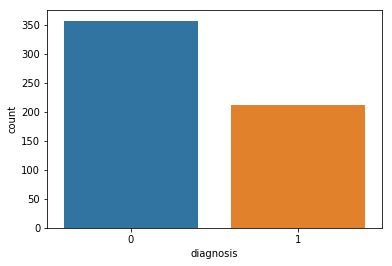

In [81]:
#creating a countplot of the 1-Malignant and 0-benign tumors
sns.countplot(x='diagnosis',data=df)

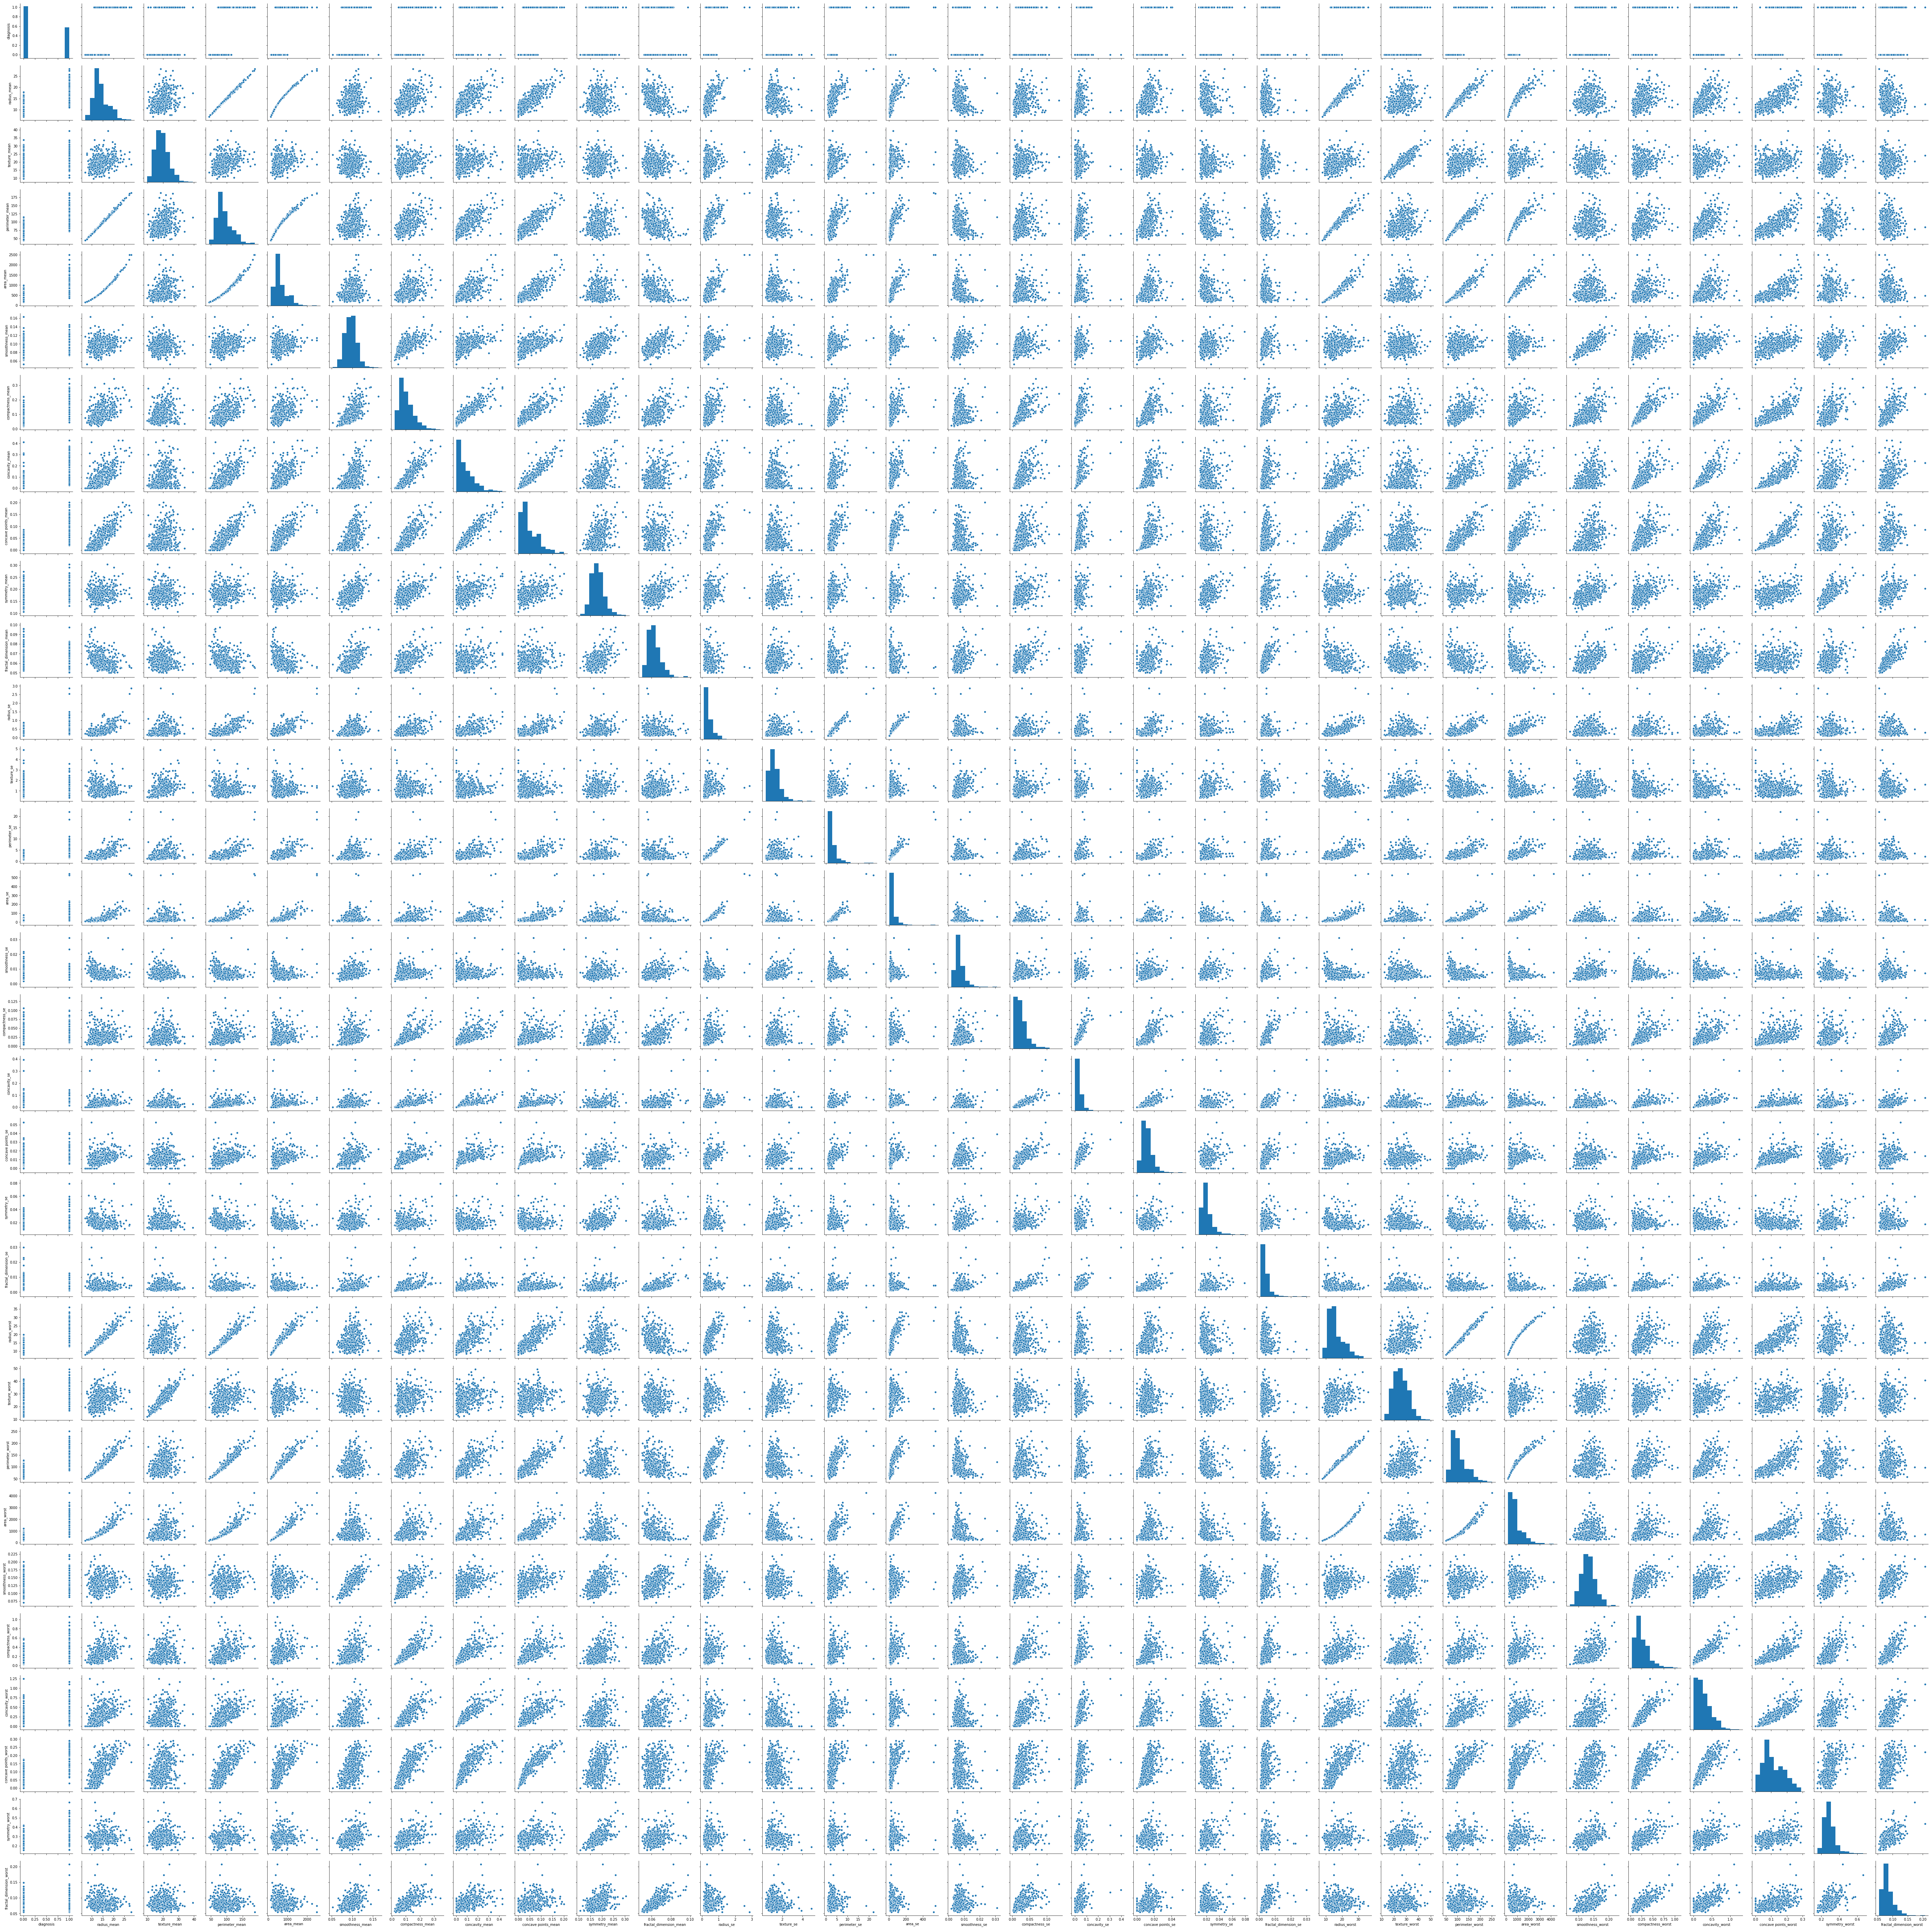

In [43]:
#constructing a pairplot for all the df to see how each value affects the other value
sns.pairplot(df)

In [46]:
#importing train test split 
from sklearn.model_selection import train_test_split

In [47]:
#selecting the features
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [48]:
# importing support vector classifier
from sklearn.svm import SVC

In [49]:
#creating the model with default parameters
model=SVC()

In [50]:
#fitting to the training data
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
#predicting for test data
prediction=model.predict(X_test)

In [52]:
#importing confusion matrix and classification report
from sklearn.metrics import confusion_matrix,classification_report

In [53]:
#checking the accuracy
print(confusion_matrix(prediction,y_test))
print(classification_report(prediction,y_test))


[[105  66]
 [  0   0]]
             precision    recall  f1-score   support

          0       1.00      0.61      0.76       171
          1       0.00      0.00      0.00         0

avg / total       1.00      0.61      0.76       171



C:\Users\VIJAYCHANDAR\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [54]:
#Using gridsearch to get the better parameters since our accuracy was low
from sklearn.grid_search import GridSearchCV

In [55]:
#creating the parameter grid
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [56]:
#creating gridsearch with parameter grid and svc 
grid=GridSearchCV(SVC(),param_grid,verbose=3)

In [57]:
#fitting with the best parameter
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.636364 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.636364 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.631579 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.636364 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.631579 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.631579 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.636364 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.902256 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.962406 -   0.0s
[CV] C

[CV] ..................... C=1000, gamma=0.01, score=0.631579 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.631579 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.636364 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.894737 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.932331 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.916667 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.909774 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [58]:
#best paramters
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [59]:
#best estimator
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
#predicting with updated parameters
grid_prediction=grid.predict(X_test)

In [61]:
#Final accuracy
print(confusion_matrix(grid_prediction,y_test))
print(classification_report(grid_prediction,y_test))

[[102   6]
 [  3  60]]
             precision    recall  f1-score   support

          0       0.97      0.94      0.96       108
          1       0.91      0.95      0.93        63

avg / total       0.95      0.95      0.95       171

